2020-04-01 06:35:19
Processing: AHE_3V_IP_RawData.ip


C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in true_divide


======================= -3.0 ============================


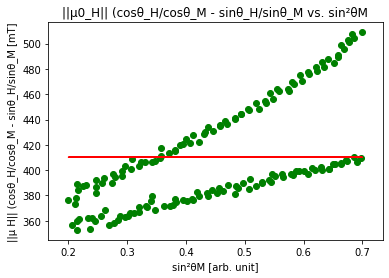

======================= -1.5 ============================


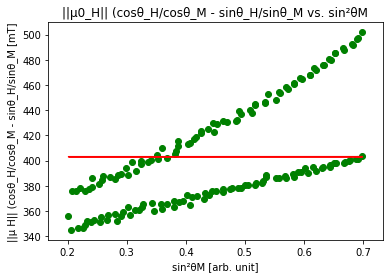

======================= -0.0 ============================


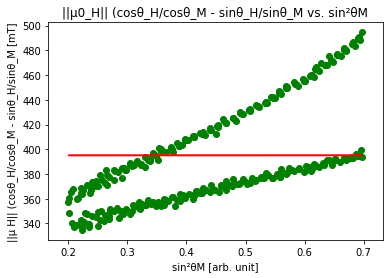

======================= 1.5 ============================


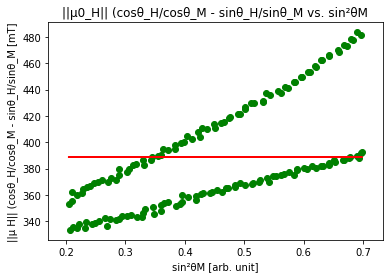

======================= 3.0 ============================


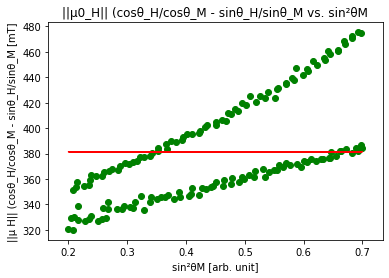

In [8]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
            
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    # Split up field array as well ()  ##this line is written by my mentor
    HVN = HV/((max(HV)-min(HV))/2)
    
    for index in range(len(HVN)):
        if HVN[index] < 0:
            theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
        else:
            theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

    #From here on issues in code
    x = sin_theta ** 2
    RHS = abs(Field * ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta)))
    array = np.column_stack([x, RHS, gate_voltage])
    
    dup = np.unique(gate_voltage)
    for i in dup:
        xFit = np.array([])
        RHSFit = np.array([])
        x_new = []
        RHS_new = []
        for a,b,c in array:
            if c == i: # change specific gate_voltage value
                x_new.append(a)
                RHS_new.append(b)
        x_new = np.array(x_new)
        RHS_new = np.array(RHS_new)
        for index in range(len(x_new)):
            if x_new[index] > 0.2 and x_new[index] < 0.7:
                xFit = np.append(xFit, x_new[index])
                RHSFit = np.append(RHSFit, RHS_new[index])

        model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
        regression_line = xFit*model.coef_ + model.intercept_

        m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
        b = np.mean(RHSFit) - m*np.mean(xFit)
        regression_line = xFit*m + b

        print(f'======================= {i} ============================')
        plt.figure(1)
        plt.scatter(xFit, RHSFit, c = 'green')
        plt.plot(xFit, regression_line, c = 'r')
        figureName = '04. RHS vs LHS.png'
        plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
        plt.xlabel("sin²\u03B8M [arb. unit]")
        plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
        plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
        plt.show()
        plt.close(1)
        

In [1]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
            
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    np.savetxt('test.txt', array, delimiter=' ')

2020-04-04 19:18:36
Processing: AHE_3V_IP_RawData.ip


In [5]:
import pandas as pd
df = pd.read_csv('test.txt', delim_whitespace=True, header=None)
df.columns=['Field','hall_voltage','gate_voltage']
df

,Field,hall_voltage,gate_voltage
0,1026.604533,10.815801,-0.0
1,1023.559332,10.813545,0.0
2,1020.266414,10.912764,0.0
3,1016.453385,11.003526,0.0
4,1012.972951,10.951097,0.0
...,...,...,...
4801,1003.963351,10.522073,0.0
4802,1007.814765,11.086942,-0.0
4803,1013.069391,10.873849,-0.0
4804,1017.739534,10.884561,0.0


In [30]:
g_0=df.loc[df['gate_voltage']==0].reset_index(drop=True)
g_m3=df.loc[df['gate_voltage']==-3].reset_index(drop=True)
g_m1P5=df.loc[df['gate_voltage']==-1.5].reset_index(drop=True)
g_3=df.loc[df['gate_voltage']==3].reset_index(drop=True)
g_1P5=df.loc[df['gate_voltage']==1.5].reset_index(drop=True)

In [31]:
np.unique(gate_voltage)

array([-3. , -1.5, -0. ,  1.5,  3. ])

In [32]:
df_new = pd.concat([g_0,g_1P5,g_m1P5,g_3,g_m3],axis=1)

In [33]:
np.savetxt('gv_seperated.txt', df_new, delimiter=' ')

In [34]:
df_new

,Field,hall_voltage,gate_voltage,Field,hall_voltage,gate_voltage,Field,hall_voltage,gate_voltage,Field,hall_voltage,gate_voltage,Field,hall_voltage,gate_voltage
0,1026.604533,10.815801,-0.0,1022.974014,10.624116,1.5,1022.586465,10.816352,-1.5,1022.620320,10.406505,3.0,1022.968769,11.054813,-3.0
1,1023.559332,10.813545,0.0,1019.548774,10.557031,1.5,1019.711852,11.009153,-1.5,1019.660234,10.580701,3.0,1019.956112,10.736302,-3.0
2,1020.266414,10.912764,0.0,1016.636252,10.869907,1.5,1016.568780,10.805078,-1.5,1016.644359,10.409323,3.0,1016.767621,11.165308,-3.0
3,1016.453385,11.003526,0.0,1012.992263,10.634262,1.5,1013.228297,10.749272,-1.5,1013.161540,10.542368,3.0,1012.922287,10.926281,-3.0
4,1012.972951,10.951097,0.0,1009.641051,10.911622,1.5,1009.794116,10.831015,-1.5,1009.893298,10.751516,3.0,1009.245515,10.868217,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,1003.963351,10.522073,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,1007.814765,11.086942,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,1013.069391,10.873849,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,1017.739534,10.884561,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
